In [23]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
filename='/content/drive/MyDrive/sales_predictions.csv'
df=pd.read_csv(filename)

In [25]:
# 1. How many rows and columns?
df.shape
# 8523 rows and 12 columns

(8523, 12)

In [26]:
#2.  What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [27]:
#3.  Are there duplicates?  If yes, drop them.
df[df.duplicated(keep=False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [28]:
#4 & #5 & #6  Identify missing values
df.isnull().sum()
# Missing values in Item_Weight and Outlet_Size
# The missing value rows are dropped since it seems
# difficult to interpolate values for the missing cells.
df_new=df.dropna()
df_new.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [29]:
#7 Fix inconsistent data

In [30]:
#8 Summary statistics of numerical columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


(0.0, 1400.0)

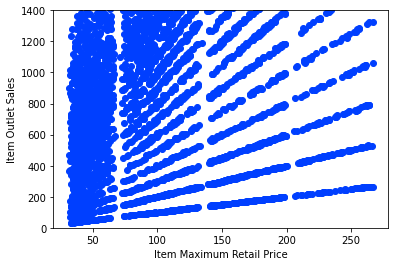

In [31]:
### Start Visualizations for PART 4 ###

# Correlation between Outlet Sales and MRP (per heatmap from last week)
x = df['Item_MRP']
y = df['Item_Outlet_Sales']
plt.style.use('seaborn-bright')
plt.scatter(x,y)

plt.xlabel('Item Maximum Retail Price')
plt.ylabel('Item Outlet Sales')
plt.ylim(bottom=0, top=1400)

Text(0.5, 1.0, 'Relationship between Fat Content and Sales')

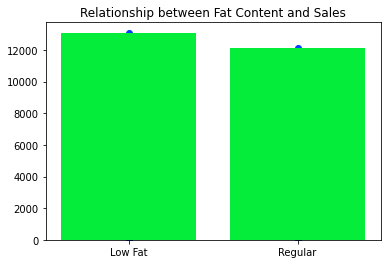

In [32]:
#  Correlation between Fat Content and Item Outlet Sales
#  Clean data so that Low Fat labels and Regular labels are
#  consistent

df['Item_Fat_Content'].replace({'low fat':"Low Fat",'LF':'Low Fat','reg':'Regular'}, inplace=True)
x = df['Item_Fat_Content']
y = df['Item_Outlet_Sales']

plt.scatter(x,y)
plt.bar(x,y)
plt.title("Relationship between Fat Content and Sales")

Text(0.5, 1.0, 'Relationship between MRP and Sales')

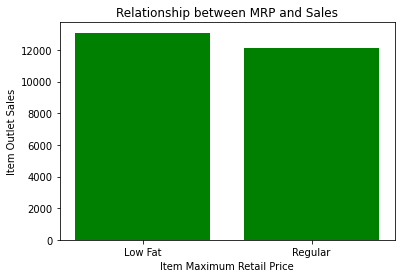

In [33]:
plt.bar(x,y, color='green')
plt.xlabel('Item Maximum Retail Price')
plt.ylabel('Item Outlet Sales')
plt.title("Relationship between MRP and Sales")


In [34]:
### PART 5  ###

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [36]:
#  There are many columns that are objects, that would need to be turned
#  into numerical variables.  These are Item Identifier, Item Fat Content,
#  Item Type, Outlet Identifier,Outlet Size, Outlet Location Type, and
#  Outlet Type.

#  I do not think there is any value in using Item Identifier and Outlet
#  Identifier in the regression as features.  I plan not to use those two
#  columns

#  Item Fat Content is an ordinal variable.  However, there are only two
#  values possible, so I plan to treat it as a Nominal variable.
#  Item Type, Outlet Location Type, and Outlet Type are Nominal
#  variables.  Outlet Size will be dropped due to missing values.
#  All 4 columns will be one hot encoded.

In [37]:
# Check for missing values
df.isnull().values.any()

True

In [38]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [39]:
df.drop(columns=['Item_Weight','Outlet_Size'], axis=1, inplace=True)

In [40]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [41]:
#  One Hot Encode
df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
                                   'Outlet_Type'], drop_first = True)
df.head()


,Item_Identifier,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,0.016047,249.8092,OUT049,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,DRC01,0.019278,48.2692,OUT018,2009,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,FDN15,0.016760,141.6180,OUT049,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,FDX07,0.000000,182.0950,OUT010,1998,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,NCD19,0.000000,53.8614,OUT013,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [42]:
df.drop(columns=['Item_Identifier'], axis=1, inplace=True)
df.drop(columns=['Outlet_Identifier'], axis=1, inplace=True)

df.dtypes

Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_Regular             uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Location_Type_Tier 2          uint8
Outlet_Location_Type_Tier 3          uint8
Outlet_Type_Supermarket Type1        uint8
Outlet_Type

In [43]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
from sklearn.metrics import mean_squared_error
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))
# The testing RMSE has a lower error value than the training RMSE, which is good.

Training RMSE: 1140.412723534625
Testing RMSE: 1094.3075709446177


In [48]:
# R Sq Value
train_score = reg.score(X_train, y_train)
print(train_score)

0.5605471715591309


In [49]:
test_score = reg.score(X_test, y_test)
print(test_score)
# R sq of both Train and Test data is 0.56, which is not a high score.
# This is not a good model.

0.5659590729075152
